In [7]:
def qZ(x, y):
    return (x - 3 * y - 2) / (x ** 2 + y ** 2 + 1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    x = [0 for _ in range(4)]
    y = [0 for _ in range(4)]
    
    x[2] = oldX[sortedId[2]]
    x[3] = oldX[sortedId[2]]
    
    x[0] = oldX[sortedId[0]]
    
    x[1] = oldX[sortedId[1]]
    
    y[0] = oldY[sortedId[2]]
    y[1] = oldY[sortedId[2]]
    
    y[2] = oldY[sortedId[0]]
    
    y[3] = oldY[sortedId[1]]
    return x, y

def sorting(Z):
    return sorted(range(len(Z)), key=lambda k: Z[k])

def evoStep(x, y, z):
    _, minId = min((value, id) for (id, value) in enumerate(z))
    x = x[:]
    y = y[:]
    z = z[:]
    
    x.pop(minId)
    y.pop(minId)
    z.pop(minId)
    return x, y, z

def evoSteps(x, y, steps_num=4):
    results = []
    for _ in range(steps_num):
        arrZ = [qZ(k, y[i]) for i, k in enumerate(x)]

        x, y, z = evoStep(x, y, arrZ)
        x, y = exchangeScheme(x, y, sorting(z))

        results.append([x, y, qSumZ(arrZ), arrZ])
    return x, y, results

x = [-1, 0, 2, 3]
y = [-2, 1, 0, -1]
results = evoSteps(x, y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -1.6363636363636362
max_2_step: -0.33333333333333337
max_3_step: 2.1666666666666665
max_4_step: 2.333333333333333
max Z: 0.6666666666666666


70.0
[1, 3, 5, 4, 6, 2, 1]
158

49.0
[1, 3, 5, 4, 6, 2, 1]
183

34.3
[1, 6, 5, 4, 3, 2, 1]
130

24.009999999999998
[1, 6, 5, 4, 3, 2, 1]
146

16.807
[1, 6, 3, 4, 5, 2, 1]
146

11.764899999999999
[1, 6, 3, 4, 5, 2, 1]
163

Лучший выбранный маршрут: [1, 6, 3, 4, 5, 2, 1]
Длина лучшего выбранного маршрута: 146


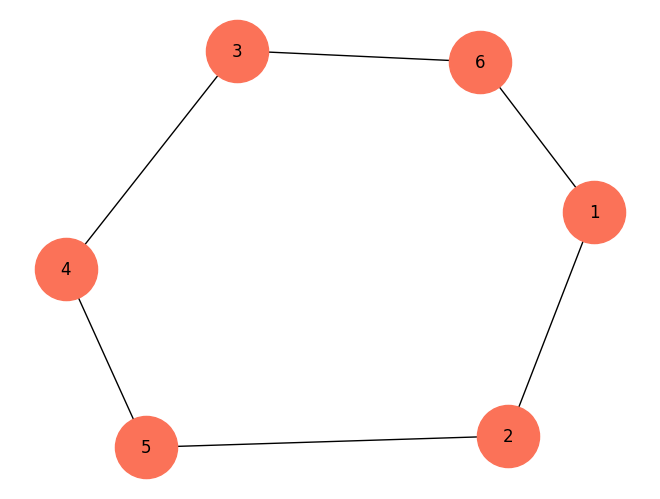

In [6]:
import networkx as nx
from math import e

distances = [
    (1, 2, 24),
    (1, 3, 41),
    (1, 4, 36),
    (1, 5, 22),
    (1, 6, 19),
    (2, 3, 21),
    (2, 4, 33),
    (2, 5, 33),
    (2, 6, 14),
    (3, 4, 27),
    (3, 5, 39),
    (3, 6, 23),
    (4, 5, 20),
    (4, 6, 20),
    (5, 6, 19)
]
V = [1, 3, 4, 5, 6, 2, 1]
Z = [(3, 4), (4, 6), (5, 2), (6, 2), (3, 5), (1, 4)]
P = [33, 82, 51, 76, 36, 60]
T = 100

def probability(delta, T):
    return 100 * e **(-delta / T)

def reductTemp(prevT):
    nextT = 0.7 * prevT
    return nextT

def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)
        print(T)
        print(V)
        print(arrSum[-1])
        print()

    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
# print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)